In [1]:
# Developing and testing a model is achieved by- 
# 1. Getting the training_data from measurement.csv, and the testing_data from forecast.csv.
# 2. Exploring the training_data to find relations between the data.
# 3. Training our model using the training_data.
# 4. Predicting the values for Power using the testing_data.
# 5. Comparing the predicted values for Power with the expected values for Power available 
# in the forecast.csv file.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [3]:
# Get the training_data

In [4]:
training_data = pd.read_csv('measurement.csv', delimiter=";")

In [5]:
#Renaming and restructuring training_data for a better visualization of attributes and labels

In [6]:
training_data.rename(columns = {"windspeed [m/s]":"WindSpeed(m/s)",
                                "ptime" : "ForecastTime",
                                "time" : "MeasurementTime","power [relative]":"RelativePower"},
            inplace = True)
training_data.head()

,ForecastTime,MeasurementTime,WindSpeed(m/s),RelativePower
0,2019-11-01,2019-11-01 01:00:00,7.47,0.32
1,2019-11-01,2019-11-01 02:00:00,7.62,0.22
2,2019-11-01,2019-11-01 03:00:00,8.35,0.27
3,2019-11-01,2019-11-01 04:00:00,8.13,0.12
4,2019-11-01,2019-11-01 05:00:00,7.73,0.25


In [7]:
training_data['MeasurementTime'] = pd.to_datetime(training_data['MeasurementTime'], format='%Y-%m-%d %H:%M:%S')
training_data['Year'] = training_data['MeasurementTime'].dt.year
training_data['Month'] = training_data['MeasurementTime'].dt.month
training_data['Day'] = training_data['MeasurementTime'].dt.day
training_data['Hour'] = training_data['MeasurementTime'].dt.hour
training_data['Minute'] = training_data['MeasurementTime'].dt.minute

In [8]:
training_data.head()

,ForecastTime,MeasurementTime,WindSpeed(m/s),RelativePower,Year,Month,Day,Hour,Minute
0,2019-11-01,2019-11-01 01:00:00,7.47,0.32,2019,11,1,1,0
1,2019-11-01,2019-11-01 02:00:00,7.62,0.22,2019,11,1,2,0
2,2019-11-01,2019-11-01 03:00:00,8.35,0.27,2019,11,1,3,0
3,2019-11-01,2019-11-01 04:00:00,8.13,0.12,2019,11,1,4,0
4,2019-11-01,2019-11-01 05:00:00,7.73,0.25,2019,11,1,5,0


In [9]:
# Exploratory Data Analysis - 
#Finding if correlation exists between independent variables(such as windspeed,year,month,day,hour, time) 
#and dependent variable(that is Power)

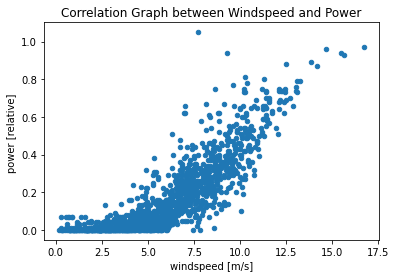

In [10]:
training_data.plot(x="WindSpeed(m/s)", y="RelativePower", kind='scatter')
plt.xlabel("windspeed [m/s]")
plt.ylabel("power [relative] ")
plt.title("Correlation Graph between Windspeed and Power")
plt.show()
plt.savefig("Windspeed_Power_Correlation.jpeg")
plt.close()

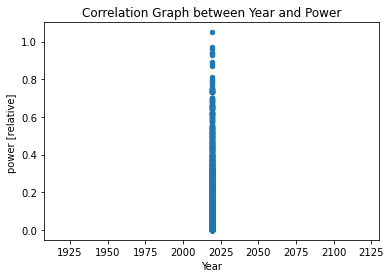

In [11]:
training_data.plot(x="Year", y="RelativePower", kind='scatter')
plt.xlabel("Year")
plt.ylabel("power [relative] ")
plt.title("Correlation Graph between Year and Power")
plt.show()
plt.savefig("Year_Power_Correlation.jpeg")
plt.close()

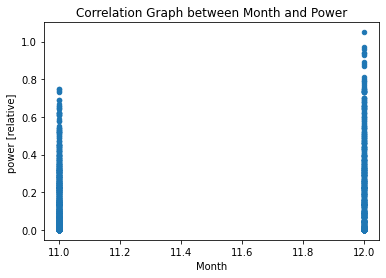

In [12]:
training_data.plot(x="Month", y="RelativePower", kind='scatter')
plt.xlabel("Month")
plt.ylabel("power [relative] ")
plt.title("Correlation Graph between Month and Power")
plt.show()
plt.savefig("Month_Power_Correlation.jpeg")
plt.close()

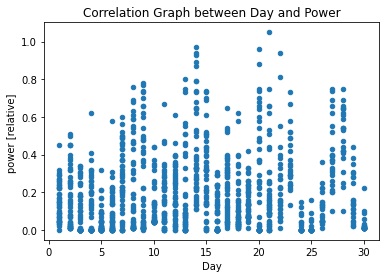

In [13]:
training_data.plot(x="Day", y="RelativePower", kind='scatter')
plt.xlabel("Day")
plt.ylabel("power [relative] ")
plt.title("Correlation Graph between Day and Power")
plt.show()
plt.savefig("Day_Power_Correlation.jpeg")
plt.close()

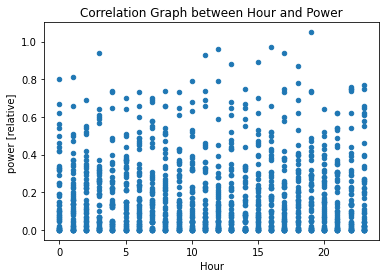

In [14]:
training_data.plot(x="Hour", y="RelativePower", kind='scatter')
plt.xlabel("Hour")
plt.ylabel("power [relative] ")
plt.title("Correlation Graph between Hour and Power")
plt.show()
plt.savefig("Hour_Power_Correlation.jpeg")
plt.close()

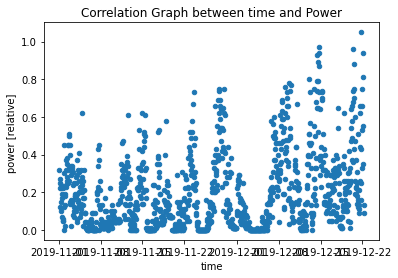

In [15]:
training_data.plot(x="MeasurementTime", y="RelativePower", kind='scatter')
plt.xlabel("time")
plt.ylabel("power [relative] ")
plt.title("Correlation Graph between time and Power")
plt.show()
plt.savefig("time_Power_Correlation.jpeg")
plt.close()

In [16]:
#Based on these plots above, RelativePower and Windspeed looks most correlated.

In [17]:
X_train= training_data[["WindSpeed(m/s)"]]
X_train

,WindSpeed(m/s)
0,7.47
1,7.62
2,8.35
3,8.13
4,7.73
...,...
1225,9.64
1226,9.28
1227,7.53
1228,6.47


In [18]:
y_train = training_data["RelativePower"]
y_train

0       0.32
1       0.22
2       0.27
3       0.12
4       0.25
        ... 
1225    0.55
1226    0.94
1227    0.35
1228    0.09
1229    0.13
Name: RelativePower, Length: 1230, dtype: float64

In [19]:
# Get the testing_data

In [20]:
testing_data = pd.read_csv('forecast.csv', delimiter=";")

In [21]:
testing_data.rename(columns = {"windspeed [m/s]":"WindSpeed(m/s)",
                                "ptime" : "ForecastTime",
                                "time" : "MeasurementTime","power [relative]":"RelativePower"},
            inplace = True)

In [22]:
X_test= testing_data[["WindSpeed(m/s)"]]
X_test

,WindSpeed(m/s)
0,7.29
1,7.07
2,7.27
3,7.46
4,6.89
...,...
265,5.72
266,5.31
267,5.25
268,5.22


In [23]:
y_expected = testing_data["RelativePower"]
y_expected

0      0.14
1      0.17
2      0.20
3      0.15
4      0.26
       ... 
265    0.52
266    0.00
267    0.09
268    0.14
269    0.75
Name: RelativePower, Length: 270, dtype: float64

In [24]:
# from sklearn.preprocessing import StandardScaler

In [25]:
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.fit_transform(X_test)
# y_train = sc.fit_transform(y_train)
# y_expected = sc.fit_transform(y_expected)

In [26]:
# Training And Testing Using different Regression Algorithms

In [27]:
# Model 1 - Using Linear Regression Algorithm

In [28]:
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

In [29]:
#Training the model
lr = LinearRegression()
lr.fit(X_train, y_train)
print("coefficient")
print(lr.coef_)

coefficient
[0.05934814]


In [30]:
predict_y_train = lr.predict(X_train)

In [31]:
# Error variation while training
print("Training RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_train, predict_y_train)))
print(r2_score(y_train, predict_y_train))

Training RMSE and R2 score:
0.10952416541378676
0.6979955943601954


In [32]:
#Testing the model
y_predict = lr.predict(X_test)

In [33]:
# Error variation in the predicted and expected values
print("Testing RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_expected, y_predict)))
print(r2_score(y_expected, y_predict))

Testing RMSE and R2 score:
0.10280087638431314
0.5874898873435953


In [34]:
# Expected and Predicted Data Representation Using Table and Graph

In [35]:
df = pd.DataFrame({'WindSpeed(m/s)':testing_data["WindSpeed(m/s)"] , 'Expected Power': y_expected, 'Predicted Power': y_predict.flatten()})
df

,WindSpeed(m/s),Expected Power,Predicted Power
0,7.29,0.14,0.251037
1,7.07,0.17,0.237980
2,7.27,0.20,0.249850
3,7.46,0.15,0.261126
4,6.89,0.26,0.227297
...,...,...,...
265,5.72,0.52,0.157860
266,5.31,0.00,0.133527
267,5.25,0.09,0.129966
268,5.22,0.14,0.128186


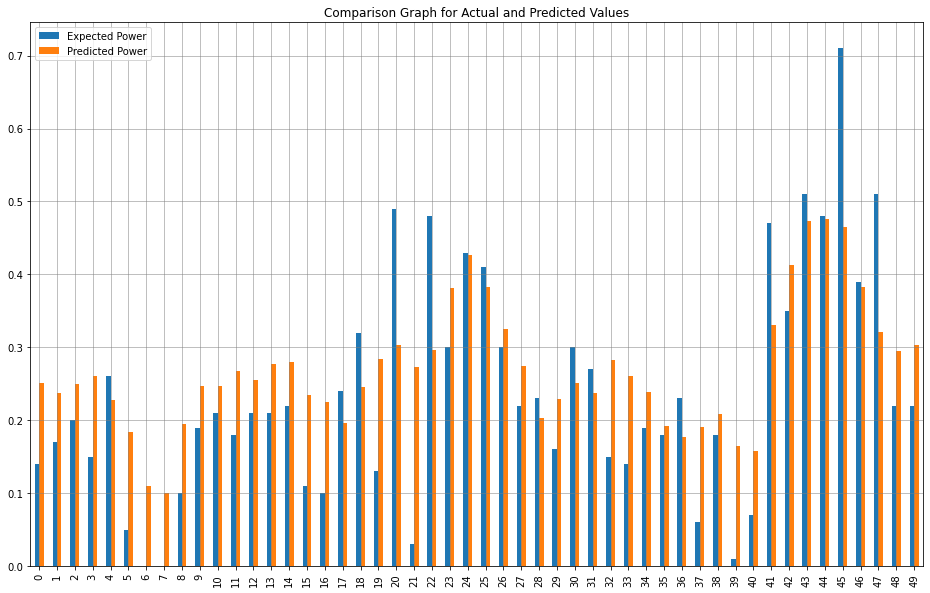

In [36]:
df1 = df.loc[:, df.columns!='WindSpeed(m/s)'].head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Comparison Graph for Actual and Predicted Values")
plt.show()
plt.close()

In [37]:
# Model 2 - Using Support Vector Regressor

In [38]:
from sklearn.svm import SVR

In [39]:
# Training the model
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
predict_training_data = regressor.predict(X_train)

In [40]:
# Error variation while training
print("Training RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_train, predict_training_data)))
print(r2_score(y_train, predict_training_data))

Training RMSE and R2 score:
0.0992505958168817
0.7519954671233704


In [41]:
# Testing the model
y_predict = regressor.predict(X_test)

In [42]:
# Error variation in the predicted and expected values
print("Testing RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_expected, y_predict)))
print(r2_score(y_expected, y_predict))

Testing RMSE and R2 score:
0.09867432725926176
0.6199424942001062


In [43]:
# Expected and Predicted Data Representation Using Table and Graph

In [44]:
df = pd.DataFrame({'WindSpeed(m/s)':testing_data["WindSpeed(m/s)"] , 'Expected Power': y_expected, 'Predicted Power': y_predict.flatten()})
df

,WindSpeed(m/s),Expected Power,Predicted Power
0,7.29,0.14,0.220642
1,7.07,0.17,0.204686
2,7.27,0.20,0.219213
3,7.46,0.15,0.232599
4,6.89,0.26,0.191336
...,...,...,...
265,5.72,0.52,0.115846
266,5.31,0.00,0.102682
267,5.25,0.09,0.101496
268,5.22,0.14,0.100970


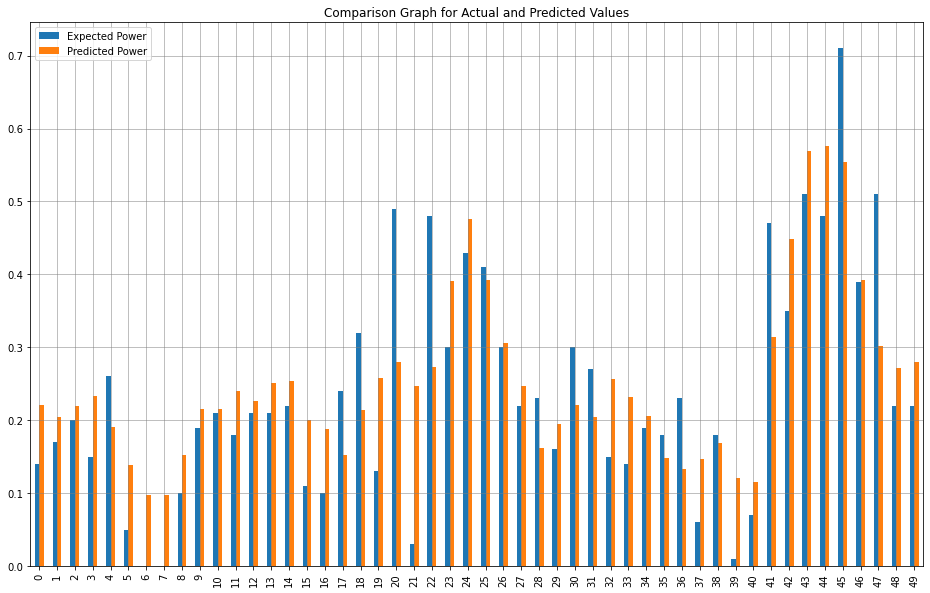

In [45]:
df1 = df.loc[:, df.columns!='WindSpeed(m/s)'].head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Comparison Graph for Actual and Predicted Values")
plt.show()
plt.close()

In [46]:
# Model 3 - Using Random Forest Regressor 

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
# Training the model
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
predict_y_train = regressor.predict(X_train)

In [49]:
# Error variation while training
print("Training RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_train, predict_y_train)))
print(r2_score(y_train, predict_y_train))

Training RMSE and R2 score:
0.07142960450556657
0.8715453398308068


In [50]:
# Testing the model 
y_predict = regressor.predict(X_test)

In [51]:
# Error variation in predicted and expected values
print("Testing RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_expected, y_predict)))
print(r2_score(y_expected, y_predict))

Testing RMSE and R2 score:
0.10124195897521149
0.5999059936523259


In [52]:
# Expected and Predicted Data Representation Using Table and Graph

In [53]:
df = pd.DataFrame({'WindSpeed(m/s)':testing_data["WindSpeed(m/s)"] , 'Expected Power': y_expected, 'Predicted Power': y_predict.flatten()})
df

,WindSpeed(m/s),Expected Power,Predicted Power
0,7.29,0.14,0.247000
1,7.07,0.17,0.172017
2,7.27,0.20,0.214754
3,7.46,0.15,0.236917
4,6.89,0.26,0.249500
...,...,...,...
265,5.72,0.52,0.120000
266,5.31,0.00,0.037600
267,5.25,0.09,0.062333
268,5.22,0.14,0.065000


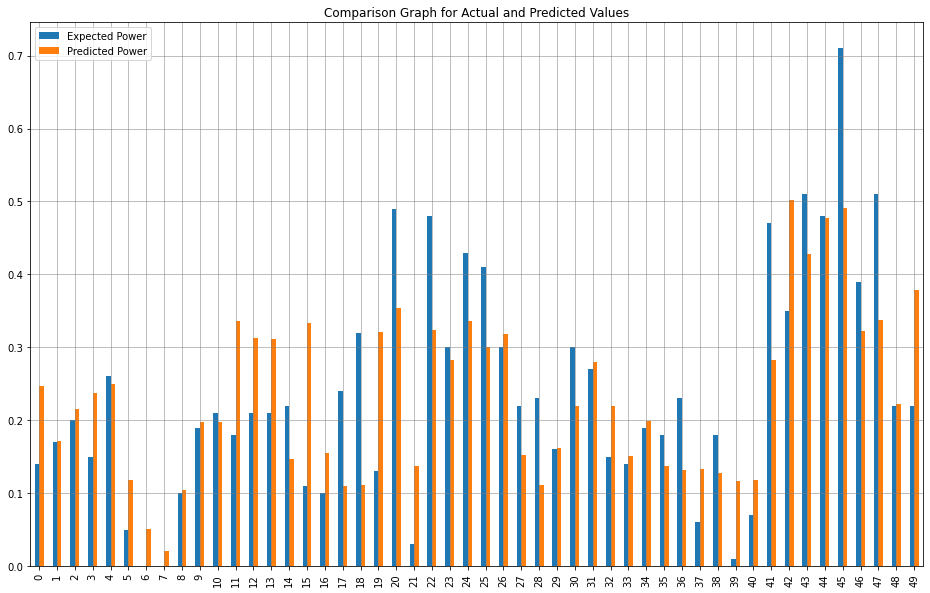

In [54]:
df1 = df.loc[:, df.columns!='WindSpeed(m/s)'].head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='grey')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Comparison Graph for Actual and Predicted Values")
plt.show()
plt.close()

In [55]:
# Both RMSE and R- Squared quantifies how well a linear regression model fits a dataset. 
# The RMSE tells how well a regression model can predict the value of a response variable in absolute terms
# R- Squared tells how well the predictor variables can explain the variation in the response variable.
# However, for comparing the accuracy among different linear regression models, 
# RMSE is a better choice than R Squared.

In [56]:
# Lower RMSE values shows that the model can relatively predict the data accurately.
# R-Squared above 0.7 would generally mean a high level of correlation, 
# whereas a measure below 0.4 would shows a low correlation

In [57]:
# Conclusion - 
# Due to the small value of RMSE in Model 2, and relatively inadmissable difference between the training and 
# testing RMSE and R2 values, the SVR model is most feasible to use.
# Also, the high R2 values in each model depicts that the Power generated by the wind farm is higly 
# dependent on the windspeed.
